In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving performance_data.csv to performance_data.csv


In [ ]:
df = pd.read_csv('performance_data.csv')

In [ ]:
# Perhitungan menggunakan library
X = df[["Sleep Hours", "Hours Studied"]]
y = df["Performance Index"]

In [ ]:
# Perhitungan menggunakan library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

coefficients = model.coef_
intercept = model.intercept_

r2_score = model.score(X_test, y_test)

# print("Intercept:", intercept)
# print("Coefficients:", coefficients)
# print("R-squared score:", r2_score)
(intercept, coefficients, r2_score, y_pred)

(64.19773796872627,
 array([-0.8201761 , -0.56156065]),
 -0.5993838562863634,
 array([52.88522848, 54.82852588, 54.82852588, 58.67079095]))

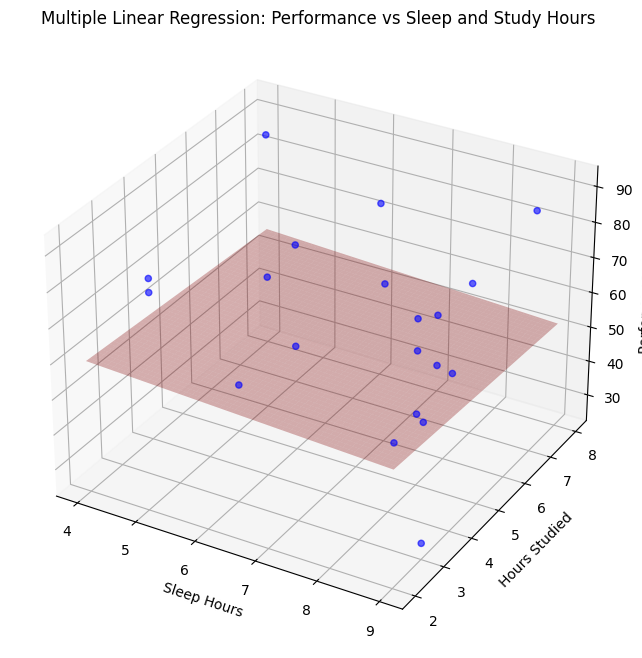

In [ ]:
# Grafik Perhitungan menggunakan Library
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data
ax.scatter(df['Sleep Hours'], df['Hours Studied'], df['Performance Index'], c='blue', marker='o', alpha=0.6, label='Actual Data')

# Create a mesh grid for the regression plane
x_surf = np.linspace(df['Sleep Hours'].min(), df['Sleep Hours'].max(), 100)
y_surf = np.linspace(df['Hours Studied'].min(), df['Hours Studied'].max(), 100)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

# Calculate the corresponding z values for the plane
z_surf = model.intercept_ + (model.coef_[0] * x_surf) + (model.coef_[1] * y_surf)

# Plot the regression plane
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.3, color='red', label='Regression Plane')

# Set labels and title
ax.set_xlabel('Sleep Hours')
ax.set_ylabel('Hours Studied')
ax.set_zlabel('Performance Index')
ax.set_title('Multiple Linear Regression: Performance vs Sleep and Study Hours')

# Show the plot
plt.show()

In [ ]:
# Perhitungan Manual
Y = df["Performance Index"]
X1 = df["Sleep Hours"]
X2 = df["Hours Studied"]

In [ ]:
# Perhitungan Manual
X = np.vstack((np.ones(len(X1)), X1, X2)).T

# Menghitung nilai A = X^T * X
A = np.dot(X.T, X)

# Mencari nilai h = X^T * Y
h = np.dot(X.T, Y)

# Menghitung koefisien b = A^(-1) * h
b = np.linalg.inv(A).dot(h)

# Display hasil dari A, h, and b
print("A:")
print(A)
print("\nh:")
print(h)
print("\nb:")
print(b)
# (A, h, b)

A:
[[ 20. 135. 114.]
 [135. 983. 740.]
 [114. 740. 722.]]

h:
[1157. 7840. 6615.]

b:
[50.41358669  0.6443006   0.54164637]


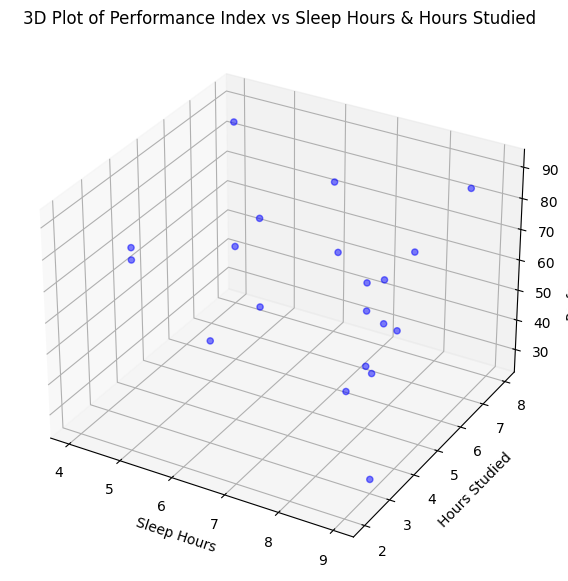

In [ ]:
# Grafik Perhitungan Manual
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
ax.scatter(X1, X2, Y, color='blue', alpha=0.5)

# Set labels
ax.set_title('3D Plot of Performance Index vs Sleep Hours & Hours Studied')
ax.set_xlabel('Sleep Hours')
ax.set_ylabel('Hours Studied')
ax.set_zlabel('Performance Index')

# Show the plot
plt.show()